In [1]:
import os
import re
import json
import gzip
import numpy as np
import pandas as pd
from urllib.request import urlopen

In [2]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [3]:
df = getDF('/home/yuqihang/workroot/models/data/recsys/Amazon/All_Beauty.json.gz')

In [4]:
df.head(2)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,1.0,True,"02 19, 2015",A1V6B6TNIC10QE,0143026860,theodore j bigham,great,One Star,1424304000,NaN,NaN,NaN
1,4.0,True,"12 18, 2014",A2F5GHSXFQ0W6J,0143026860,Mary K. Byke,My husband wanted to reading about the Negro ...,... to reading about the Negro Baseball and th...,1418860800,NaN,NaN,NaN


In [5]:
metadata = []
with gzip.open('/home/yuqihang/workroot/models/data/recsys/Amazon/meta_All_Beauty.json.gz') as f:
    for l in f:
        metadata.append(json.loads(l.strip()))

In [6]:
# total length of list, this number equals total number of products
print(len(metadata))

# first row of the list
print(metadata[0])

# convert list into pandas dataframe

df_meta = pd.DataFrame.from_dict(metadata)

print(len(df_meta))

32892
{'category': [], 'tech1': '', 'description': ["Loud 'N Clear Personal Sound Amplifier allows you to turn up the volume on what people around you are saying, listen at the level you want without disturbing others, hear a pin drop from across the room."], 'fit': '', 'title': "Loud 'N Clear&trade; Personal Sound Amplifier", 'also_buy': [], 'tech2': '', 'brand': 'idea village', 'feature': [], 'rank': '2,938,573 in Beauty & Personal Care (', 'also_view': [], 'details': {'ASIN: ': '6546546450'}, 'main_cat': 'All Beauty', 'similar_item': '', 'date': '', 'price': '', 'asin': '6546546450', 'imageURL': [], 'imageURLHighRes': []}
32892


In [7]:
df_meta.head(5)

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,[],,[Loud 'N Clear Personal Sound Amplifier allows...,,Loud 'N Clear&trade; Personal Sound Amplifier,[],,idea village,[],"2,938,573 in Beauty & Personal Care (",[],{'ASIN: ': '6546546450'},All Beauty,,,,6546546450,[],[]
1,[],,[No7 Lift & Luminate Triple Action Serum 50ml ...,,No7 Lift &amp; Luminate Triple Action Serum 50...,"[B01E7LCSL6, B008X5RVME]",,,[],"872,854 in Beauty & Personal Care (",[],"{'Shipping Weight:': '0.3 ounces (', 'ASIN: ':...",All Beauty,"class=""a-bordered a-horizontal-stripes a-spa...",,$44.99,7178680776,[],[]
2,[],,[No7 Stay Perfect Foundation now stays perfect...,,No7 Stay Perfect Foundation Cool Vanilla by No7,[],,No7,[],"956,696 in Beauty & Personal Care (","[B01B8BR0O8, B01B8BR0NO, B014MHXXM8]","{'Shipping Weight:': '3.5 ounces (', 'ASIN: ':...",All Beauty,,,$28.76,7250468162,[],[]
3,[],,[],,Wella Koleston Perfect Hair Colour 44/44 Mediu...,[B0041PBXX8],,,[],"1,870,258 in Beauty & Personal Care (",[],"{' Item Weight: ': '1.76 ounces', 'Sh...",All Beauty,,,,7367905066,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,[],,[Lacto Calamine Skin Balance Daily Nourishing ...,,Lacto Calamine Skin Balance Oil control 120 ml...,[],,Pirmal Healthcare,[],"67,701 in Beauty & Personal Care (","[3254895630, B007VL1D9S, B00EH9A0RI, B0773MBG4...","{'Shipping Weight:': '12 ounces (', 'ASIN: ': ...",All Beauty,,,$12.15,7414204790,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


In [8]:
df3 = df_meta.fillna('')
df4 = df3[df3.title.str.contains('getTime')] # unformatted rows
df5 = df3[~df3.title.str.contains('getTime')] # filter those unformatted rows
print(len(df4))
print(len(df5))

0
32892


In [9]:
# df['rating'].dropna().describe()
df['overall'].dropna().describe()

count    371345.000000
mean          4.112093
std           1.362099
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64

In [10]:
df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'style', 'image'],
      dtype='object')

In [11]:
rating = df[['asin','reviewerID','overall','unixReviewTime']]
# rating = df[['rating','timestamp','user_id','asin','helpful_vote']]
rating.head(2) 

,asin,reviewerID,overall,unixReviewTime
0,0143026860,A1V6B6TNIC10QE,1.0,1424304000
1,0143026860,A2F5GHSXFQ0W6J,4.0,1418860800


In [12]:
rating['overall'].describe()

count    371345.000000
mean          4.112093
std           1.362099
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64

In [13]:
# rating = rating[['asin','reviewerID','overall','unixReviewTime']]
# rating = rating[['asin','user_id','rating','timestamp']]
rating.columns = ['asin','user','rating','timestamp']

In [14]:
df5.columns

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'details', 'main_cat',
       'similar_item', 'date', 'price', 'asin', 'imageURL', 'imageURLHighRes'],
      dtype='object')

In [15]:
# meta_data = df5[['asin','category','title','brand','price']]
meta_data = df5[['asin','category','title','description','price','brand']]
# meta_data.columns = ['asin','category','title','brand','price']
meta_data.head(2)

,asin,category,title,description,price,brand
0,6546546450,[],Loud 'N Clear&trade; Personal Sound Amplifier,[Loud 'N Clear Personal Sound Amplifier allows...,,idea village
1,7178680776,[],No7 Lift &amp; Luminate Triple Action Serum 50...,[No7 Lift & Luminate Triple Action Serum 50ml ...,$44.99,


In [16]:
meta_data.shape

(32892, 6)

In [17]:
meta_data['title'] = meta_data['title'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x.replace('&','')))
meta_data['title'] = meta_data['title'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))

/tmp/ipykernel_2058465/2482686894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_data['title'] = meta_data['title'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x.replace('&','')))
/tmp/ipykernel_2058465/2482686894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_data['title'] = meta_data['title'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))


In [18]:
meta_data = meta_data.drop_duplicates(subset=['asin'],keep='last')
# meta_data = meta_data.drop_duplicates(subset=['title'],keep='last')
meta_data.shape

(32488, 6)

In [19]:
len(set(meta_data['title']))

32297

In [20]:
meta_data.head(2)

,asin,category,title,description,price,brand
0,6546546450,[],Loud 'N Cleartrade; Personal Sound Amplifier,[Loud 'N Clear Personal Sound Amplifier allows...,,idea village
1,7178680776,[],No7 Lift amp; Luminate Triple Action Serum 50m...,[No7 Lift & Luminate Triple Action Serum 50ml ...,$44.99,


In [21]:
data = rating.merge(meta_data,on='asin',how='right')

In [22]:
data.head(2)

,asin,user,rating,timestamp,category,title,description,price,brand
0,6546546450,A3349A7IGM954K,4.0,1.376352e+09,[],Loud 'N Cleartrade; Personal Sound Amplifier,[Loud 'N Clear Personal Sound Amplifier allows...,,idea village
1,6546546450,A1OMHUU58XHQNG,1.0,1.233187e+09,[],Loud 'N Cleartrade; Personal Sound Amplifier,[Loud 'N Clear Personal Sound Amplifier allows...,,idea village


In [23]:
data.shape

(366225, 9)

In [24]:
data.dropna(subset=['user'], inplace=True)
data.dropna(subset=['asin'], inplace=True)
data.dropna(subset=['title'], inplace=True)
data.dropna(subset=['timestamp'], inplace=True)

In [25]:
data.shape

(366223, 9)

In [26]:
data.head()

,asin,user,rating,timestamp,category,title,description,price,brand
0,6546546450,A3349A7IGM954K,4.0,1.376352e+09,[],Loud 'N Cleartrade; Personal Sound Amplifier,[Loud 'N Clear Personal Sound Amplifier allows...,,idea village
1,6546546450,A1OMHUU58XHQNG,1.0,1.233187e+09,[],Loud 'N Cleartrade; Personal Sound Amplifier,[Loud 'N Clear Personal Sound Amplifier allows...,,idea village
2,7178680776,A3Q0QXUKRGACMU,3.0,1.507248e+09,[],No7 Lift amp; Luminate Triple Action Serum 50m...,[No7 Lift & Luminate Triple Action Serum 50ml ...,$44.99,
3,7250468162,A3MQI5EJSEDO1K,5.0,1.503706e+09,[],No7 Stay Perfect Foundation Cool Vanilla by No7,[No7 Stay Perfect Foundation now stays perfect...,$28.76,No7
4,7367905066,A29TKERPFM55B6,5.0,1.491955e+09,[],Wella Koleston Perfect Hair Colour 44/44 Mediu...,[],,


In [27]:
#查看title列数据类型
type(data['category'][0]),type(data['description'][0]),type(data['title'][0]),type(data['price'][0]),type(data['brand'][0])

(list, list, str, str, str)

In [28]:
data['description'] = data['description'].apply(lambda x: ', '.join(x) if x else '')
data['category'] = data['category'].apply(lambda x: ', '.join(x[1:]) if x else '')

In [35]:
data.head(5)

,asin,user,rating,timestamp,title,description,price,brand
0,6546546450,A3349A7IGM954K,4.0,1.376352e+09,Loud 'N Cleartrade; Personal Sound Amplifier,Loud 'N Clear Personal Sound Amplifier allows ...,,idea village
1,6546546450,A1OMHUU58XHQNG,1.0,1.233187e+09,Loud 'N Cleartrade; Personal Sound Amplifier,Loud 'N Clear Personal Sound Amplifier allows ...,,idea village
2,7178680776,A3Q0QXUKRGACMU,3.0,1.507248e+09,No7 Lift amp; Luminate Triple Action Serum 50m...,No7 Lift & Luminate Triple Action Serum 50ml b...,$44.99,
3,7250468162,A3MQI5EJSEDO1K,5.0,1.503706e+09,No7 Stay Perfect Foundation Cool Vanilla by No7,No7 Stay Perfect Foundation now stays perfect ...,$28.76,No7
4,7367905066,A29TKERPFM55B6,5.0,1.491955e+09,Wella Koleston Perfect Hair Colour 44/44 Mediu...,,,


In [36]:
rating_ = data.copy()
rating_.head(2)

,asin,user,rating,timestamp,title,description,price,brand
0,6546546450,A3349A7IGM954K,4.0,1.376352e+09,Loud 'N Cleartrade; Personal Sound Amplifier,Loud 'N Clear Personal Sound Amplifier allows ...,,idea village
1,6546546450,A1OMHUU58XHQNG,1.0,1.233187e+09,Loud 'N Cleartrade; Personal Sound Amplifier,Loud 'N Clear Personal Sound Amplifier allows ...,,idea village


In [37]:
rating_.columns = ['iid','uid','rating','timestamp','title','description','price','brand']
rating_.head(2)

,iid,uid,rating,timestamp,title,description,price,brand
0,6546546450,A3349A7IGM954K,4.0,1.376352e+09,Loud 'N Cleartrade; Personal Sound Amplifier,Loud 'N Clear Personal Sound Amplifier allows ...,,idea village
1,6546546450,A1OMHUU58XHQNG,1.0,1.233187e+09,Loud 'N Cleartrade; Personal Sound Amplifier,Loud 'N Clear Personal Sound Amplifier allows ...,,idea village


In [38]:
date_min = pd.to_datetime(rating_.timestamp,unit='s').min()
date_max = pd.to_datetime(rating_.timestamp,unit='s').max()
date_min,date_max

(Timestamp('2000-10-29 00:00:00'), Timestamp('2018-10-02 00:00:00'))

In [39]:
rating_.shape

(366223, 8)

In [33]:
date_gap = (date_max-date_min)//(19*2)
date_gap

Timedelta('215 days 00:00:00')

In [40]:
rating_['time'] = pd.to_datetime(rating_.timestamp, unit='s').map(lambda x: x.year )

In [41]:
rating_.head(2)

,iid,uid,rating,timestamp,title,description,price,brand,time
0,6546546450,A3349A7IGM954K,4.0,1.376352e+09,Loud 'N Cleartrade; Personal Sound Amplifier,Loud 'N Clear Personal Sound Amplifier allows ...,,idea village,2013
1,6546546450,A1OMHUU58XHQNG,1.0,1.233187e+09,Loud 'N Cleartrade; Personal Sound Amplifier,Loud 'N Clear Personal Sound Amplifier allows ...,,idea village,2009


In [42]:
import numpy as np
np.sort(rating_.time.unique())

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [43]:
rating_.uid.unique().shape, rating_.iid.unique().shape

((319335,), (32486,))

In [44]:
rating_ = rating_[['iid','uid','rating','timestamp','title','description','price','brand','time']]

In [33]:
# rating_['length'] = rating_['description'].apply(lambda x: len(x.split()))

In [45]:
rating_.head()

,iid,uid,rating,timestamp,title,description,price,brand,time
0,6546546450,A3349A7IGM954K,4.0,1.376352e+09,Loud 'N Cleartrade; Personal Sound Amplifier,Loud 'N Clear Personal Sound Amplifier allows ...,,idea village,2013
1,6546546450,A1OMHUU58XHQNG,1.0,1.233187e+09,Loud 'N Cleartrade; Personal Sound Amplifier,Loud 'N Clear Personal Sound Amplifier allows ...,,idea village,2009
2,7178680776,A3Q0QXUKRGACMU,3.0,1.507248e+09,No7 Lift amp; Luminate Triple Action Serum 50m...,No7 Lift & Luminate Triple Action Serum 50ml b...,$44.99,,2017
3,7250468162,A3MQI5EJSEDO1K,5.0,1.503706e+09,No7 Stay Perfect Foundation Cool Vanilla by No7,No7 Stay Perfect Foundation now stays perfect ...,$28.76,No7,2017
4,7367905066,A29TKERPFM55B6,5.0,1.491955e+09,Wella Koleston Perfect Hair Colour 44/44 Mediu...,,,,2017


In [35]:
# rating__ = rating_[rating_['length'] > 15]

In [36]:
# rating__ = rating__[rating__['length'] < 500]

In [50]:
# rating__.length.describe()

NameError: name 'rating__' is not defined

In [46]:
rating__ = rating_.copy()

In [49]:
s_rating = rating__

In [62]:
s_rating = rating__[rating__.time.isin([2014,2015,2016,2017,2018])].copy()
s_rating['time'] = pd.to_datetime(s_rating.timestamp, unit='s').map(lambda x: (x.year-2014)*12+x.month)
# s_rating = s_rating[s_rating.time.isin(range(1,13))]

In [63]:
s_rating.shape

(305911, 9)

In [64]:
s_rating.groupby('uid').agg({"rating":'count'}).describe()

,rating
count,271156.000000
mean,1.128173
std,0.479985
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,26.000000


In [33]:
s_rating.groupby('uid').agg({"rating":'count'}).describe()

,rating
count,3.330909e+06
mean,2.185934e+00
std,6.108465e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,2.000000e+00
max,1.294000e+03


In [65]:
item_info = s_rating.groupby('iid').agg({"rating":'count'})
user_info = s_rating.groupby('uid').agg({"rating":'count'})

In [66]:
active_item = item_info[item_info['rating']>5].index #.sample(frac=10/20,random_state=2023).index
active_user = user_info[user_info['rating']>5].index #.sample(frac=10/20,random_state=2023).index
active_item.shape, active_user.shape

((6920,), (501,))

In [41]:
active_item = item_info[item_info['rating']>20].index #.sample(frac=10/20,random_state=2023).index
active_user = user_info[user_info['rating']>20].index #.sample(frac=10/20,random_state=2023).index
active_item.shape, active_user.shape

((68023,), (24291,))

In [67]:
s_rating = s_rating[s_rating['uid'].isin(active_user)]
s_rating = s_rating[s_rating['iid'].isin(active_item)]
s_rating.shape

(2868, 9)

In [36]:
s_rating = s_rating[s_rating['uid'].isin(active_user)]
s_rating = s_rating[s_rating['iid'].isin(active_item)]
s_rating.shape

(845689, 9)

In [68]:
item_info = s_rating.groupby('iid').agg({"rating":'count'})
user_info = s_rating.groupby('uid').agg({"rating":'count'})
user_info.mean(), item_info.mean()

(rating    5.747495
 dtype: float64,
 rating    4.425926
 dtype: float64)

In [37]:
item_info = s_rating.groupby('iid').agg({"rating":'count'})
user_info = s_rating.groupby('uid').agg({"rating":'count'})
user_info.mean(), item_info.mean()

(rating    34.018061
 dtype: float64,
 rating    16.628436
 dtype: float64)

In [69]:
s_rating.shape, s_rating.uid.unique().shape, s_rating.iid.unique().shape

((2868, 9), (499,), (648,))

In [38]:
s_rating.shape, s_rating.uid.unique().shape, s_rating.iid.unique().shape

((845689, 9), (24860,), (50858,))

In [70]:
s_rating = s_rating.reset_index()
s_rating.head(2)

,index,iid,uid,rating,timestamp,title,description,price,brand,time
0,1476,B000050FDY,A10ZBR6O8S8OCY,5.0,1.497830e+09,Braun Clean amp; Renew Refill Cartridges CCR -...,"With Braun Clean & Renew refills, you can keep...",$11.94,Braun,42
1,1815,B000050FDY,A198RQKA8VFDQ8,5.0,1.444262e+09,Braun Clean amp; Renew Refill Cartridges CCR -...,"With Braun Clean & Renew refills, you can keep...",$11.94,Braun,22


<Axes: xlabel='time'>

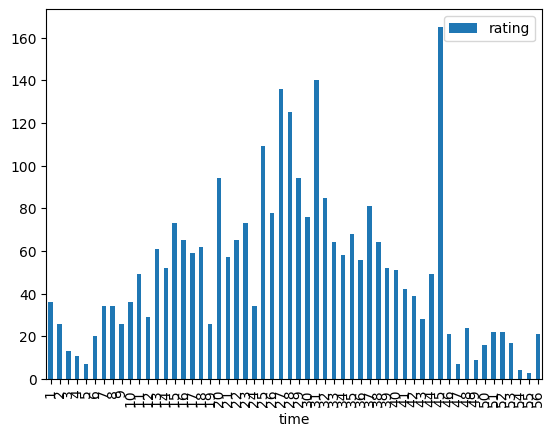

In [71]:
s_rating.groupby('time').agg({'rating':'count'}).reset_index().plot(x='time',kind='bar')

In [72]:
s_rating.rating.unique()

array([5., 2., 4., 3., 1.])

In [73]:
s_rating['label'] = s_rating['rating'].apply(lambda x: 1 if x>=5 else 0)
s_rating['label'].describe()

count    2868.000000
mean        0.815551
std         0.387918
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: label, dtype: float64

In [42]:
s_rating['label'] = s_rating['rating'].apply(lambda x: 1 if x>=5 else 0)
s_rating['label'].describe()

count    845689.00000
mean          0.63175
std           0.48233
min           0.00000
25%           0.00000
50%           1.00000
75%           1.00000
max           1.00000
Name: label, dtype: float64

In [74]:
users = s_rating.uid.unique()
items = s_rating.iid.unique()
users_map = dict(zip(users, np.arange(users.shape[0])+1))
items_map = dict(zip(items, np.arange(items.shape[0])+1))
s_rating['uid'] = s_rating['uid'].map(users_map)
s_rating['iid'] = s_rating['iid'].map(items_map)
s_rating.uid.max(), s_rating.iid.max()

(499, 648)

In [75]:
s_rating['description'] = s_rating['description'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x.replace('&','')))
s_rating['description'] = s_rating['description'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))
s_rating['title'] = s_rating['title'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x.replace('&','')))
s_rating['title'] = s_rating['title'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))
s_rating['brand'] = s_rating['brand'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x.replace('&','')))
s_rating['brand'] = s_rating['brand'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))
s_rating['price'] = s_rating['price'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))

In [76]:
s_rating.head()

,index,iid,uid,rating,timestamp,title,description,price,brand,time,label
0,1476,1,1,5.0,1.497830e+09,Braun Clean amp; Renew Refill Cartridges CCR -...,"With Braun Clean Renew refills, you can keep y...",$11.94,Braun,42,1
1,1815,1,2,5.0,1.444262e+09,Braun Clean amp; Renew Refill Cartridges CCR -...,"With Braun Clean Renew refills, you can keep y...",$11.94,Braun,22,1
2,2248,2,3,5.0,1.447286e+09,Scope Original Mint Mouthwash 50.7 Fl Oz,Scope Original Mint Rinse kills bad breath ger...,,Unknown,23,1
3,4108,3,4,5.0,1.433117e+09,Panasonic Bikini Shaper and Trimmer for Women ...,"Perfect for sensitive skin types, this bikini ...",$18.49,Panasonic,18,1
4,5566,4,5,5.0,1.524614e+09,Citre Shine Moisture Burst Shampoo - 16 fl oz,Restores Moisture to Dehydrated Hair End your ...,$23.00,Citre Shine,52,1


In [77]:
s_rating.tail()

,index,iid,uid,rating,timestamp,title,description,price,brand,time,label
2863,363988,644,489,5.0,1.468627e+09,Ameacute;lie Brightening Eye Cream For Dark Ci...,,,,31,1
2864,364114,645,492,4.0,1.467677e+09,Eshion 12pcs High Quality Makeup Cosmetic Lips...,,$9.99,,31,0
2865,364651,646,448,5.0,1.488758e+09,E'TAE Natural Products - Carmel Deep Reconstru...,Use before shampooing. Store at room temperatu...,$20.72,,39,1
2866,364850,647,478,5.0,1.509926e+09,Women's Chic Sterling Silver Crystal Heart Sha...,,,,47,1
2867,365655,648,434,3.0,1.504483e+09,Technic Get Gorgeous Bronzing Highlighting Pow...,"Highlight, sculpt and define your face feature...",$6.99,Technic,45,0


In [78]:
s_rating.iid.unique().shape

(648,)

In [79]:
id2title = {}
# title2id = {}
for i in range(len(s_rating)):
    iid = int(s_rating.iloc[i]['iid'])
    title = str(s_rating.iloc[i]['title'])
    description = str(s_rating.iloc[i]['description'])
    # category = str(s_rating.iloc[i]['category'])
    brand = str(s_rating.iloc[i]['brand'])
    price = str(s_rating.iloc[i]['price'])
    if iid not in id2title:
        id2title[iid] = {
            'title':title,
            'description':description,
            # 'category':category,
            'brand':brand,
            'price':price,
            }
    # if title not in title2id:
    #     title2id[title] = {
    #         'id':iid,
    #         'description':description,
    #         'category':category,
    #         'brand':brand,
    #         'price':price,
    #         }
print(len(id2title.keys()))
# print(len(id2title.keys()),len(title2id.keys()))


648


In [80]:
#保存为字典 id2title 为 json 文件
import json
json_dir = '/home/yuqihang/workroot/models/data/collm/Beauty'
json.dump(id2title, open(f"{json_dir}/id2title.json", "w"), indent=4)
# json.dump(title2id, open(f"{json_dir}/title2id.json", "w"), indent=4)

In [62]:
with open('/home/yuqihang/projects/CoLLM/collm-datasets/booknew/id2keywords.json','r') as f:
    id2keywords = json.load(f)

In [71]:
for idx,meta in id2title.items():
    try:
        meta['keywords'] = id2keywords[idx]['keywords']
    except:
        print(f'can\'t find {idx} in id2keywords')
    id2title[idx] = meta

In [72]:
json.dump(id2title, open(f"{json_dir}/id2title.json", "w"), indent=4)

In [73]:
# id2title = {}
# for title,meta in title2id.items():
#     idx = meta['id']
#     del meta['id']
#     meta['title'] = title
#     id2title[idx] = meta

In [74]:
# json.dump(id2title, open(f"{json_dir}/id2title.json", "w"), indent=4)

In [78]:
del id2title
# del title2id
del title2keywords

In [82]:
rating_train = s_rating[s_rating.time.isin(range(33))].copy()
rating_valid_test = s_rating[s_rating.time.isin(range(33,37))].copy()
rating_valid_test.sort_values(by="timestamp",inplace=True)
N_ = rating_valid_test.shape[0]//2
rating_valid = rating_valid_test.iloc[:N_].copy()
rating_test = rating_valid_test.iloc[N_:].copy()
rating_train.shape, rating_valid.shape, rating_test.shape

((1885, 11), (123, 11), (123, 11))

In [83]:
rating_valid_test.timestamp.values[0:5].argsort()

array([0, 1, 2, 3, 4])

In [84]:
rating_train.time.unique(),rating_valid.time.unique(),rating_test.time.unique()

(array([22, 23, 18, 32, 31, 30, 29, 28, 27, 26, 25, 24, 21, 20, 19, 17, 16,
        15, 14, 13, 12, 11, 10,  8,  7,  6,  2,  1,  9,  5,  4,  3]),
 array([33, 34, 35]),
 array([35, 36]))

In [85]:
s_rating[s_rating.time.isin(range(33))].groupby('iid').agg({"rating":'count'}).mean()

rating    3.70334
dtype: float64

In [86]:
train_user = rating_train['uid'].unique()
train_item = rating_train['iid'].unique()
rating_valid['not_cold'] = rating_valid[['uid','iid']].apply(lambda x: x.uid in train_user and x.iid in train_item, axis=1).astype("int")
rating_test['not_cold'] = rating_test[['uid','iid']].apply(lambda x: x.uid in train_user and x.iid in train_item, axis=1).astype("int")

In [87]:
rating_valid['not_cold'].describe(), rating_test['not_cold'].describe()

(count    123.000000
 mean       0.105691
 std        0.308699
 min        0.000000
 25%        0.000000
 50%        0.000000
 75%        0.000000
 max        1.000000
 Name: not_cold, dtype: float64,
 count    123.000000
 mean       0.065041
 std        0.247606
 min        0.000000
 25%        0.000000
 50%        0.000000
 75%        0.000000
 max        1.000000
 Name: not_cold, dtype: float64)

In [88]:
rating_train.shape, rating_valid.shape, rating_test.shape

((1885, 11), (123, 12), (123, 12))

In [89]:
rating_train.groupby("uid").agg({'label':['count','sum']}).describe(), rating_train.groupby("iid").agg({'label':['count','sum']}).describe()

(            label            
             count         sum
 count  386.000000  386.000000
 mean     4.883420    4.106218
 std      1.777021    2.194826
 min      1.000000    0.000000
 25%      4.000000    2.000000
 50%      5.000000    5.000000
 75%      6.000000    5.000000
 max     14.000000   13.000000,
             label            
             count         sum
 count  509.000000  509.000000
 mean     3.703340    3.113949
 std     24.025503   22.590387
 min      1.000000    0.000000
 25%      1.000000    0.000000
 50%      1.000000    1.000000
 75%      2.000000    1.000000
 max    442.000000  416.000000)

In [138]:
rating_train.groupby("uid").agg({'label':['count','sum']}).describe(), rating_train.groupby("iid").agg({'label':['count','sum']}).describe()

(              label              
               count           sum
 count  21700.000000  21700.000000
 mean      33.217005     19.755161
 std       31.872163     21.036342
 min        1.000000      0.000000
 25%       17.000000      8.000000
 50%       24.000000     15.000000
 75%       38.000000     24.000000
 max      698.000000    642.000000,
               label              
               count           sum
 count  52444.000000  52444.000000
 mean      13.744356      8.174186
 std       25.850157     17.063427
 min        1.000000      0.000000
 25%        2.000000      1.000000
 50%        6.000000      3.000000
 75%       15.000000      8.000000
 max     2120.000000   1272.000000)

In [90]:
# rating_valid.groupby("uid").agg({'label':['count','sum']}).describe()
rating_test.groupby("uid").agg({'label':['count','sum']}).describe(), rating_test.groupby("iid").agg({'label':['count','sum']}).describe()
# rating_valid_test.groupby("uid").agg({'label':['count','sum']}).describe()

(           label           
            count        sum
 count  34.000000  34.000000
 mean    3.617647   3.470588
 std     2.089145   2.246011
 min     1.000000   0.000000
 25%     1.000000   1.000000
 50%     5.000000   5.000000
 75%     5.000000   5.000000
 max     7.000000   7.000000,
            label           
            count        sum
 count  38.000000  38.000000
 mean    3.236842   3.105263
 std     6.740095   6.793437
 min     1.000000   0.000000
 25%     1.000000   1.000000
 50%     1.000000   1.000000
 75%     1.000000   1.000000
 max    36.000000  36.000000)

## split by time order

In [91]:
rating_train.shape, rating_valid.shape, rating_test.shape

((1885, 11), (123, 12), (123, 12))

In [92]:
rating_valid_f = rating_valid
rating_test_f = rating_test

In [93]:
def filter_cold_start(train,valid,test):
    train_user = train.uid.unique()
    train_item = train.iid.unique()
    valid = valid[valid['uid'].isin(train_user)]
    test = test[test['uid'].isin(train_user)]
    valid = valid[valid['iid'].isin(train_item)]
    test = test[test['iid'].isin(train_item)]
    return valid, test

In [94]:
rating_train.label.mean(), rating_valid.label.mean(), rating_test.label.mean()

(0.8408488063660478, 0.7967479674796748, 0.959349593495935)

In [95]:
rating_valid_f.label.mean(), rating_test_f.label.mean() 

(0.7967479674796748, 0.959349593495935)

In [96]:
rating_valid_f.columns

Index(['index', 'iid', 'uid', 'rating', 'timestamp', 'title', 'description',
       'price', 'brand', 'time', 'label', 'not_cold'],
      dtype='object')

In [97]:
import copy
def deal_with_each_u_both(x,u):
    items = np.array(x.iid)
    labels = np.array(x.label)
    titles = np.array(x.title)
    descriptions = np.array(x.description)
    timestamp = np.array(x.timestamp)
    flags =  np.array(x.flag) 
    his = [0] # adding a '0' by default
    his_label = [0]
    # his_title = ['']
    # his_desc = ['']
    results = []
    for i in range(items.shape[0]):
        results.append((u, items[i], timestamp[i], np.array(his), np.array(his_label), labels[i], flags[i]))
        # results.append((u, items[i], titles[i], timestamp[i], np.array(his), np.array(his_label), copy.copy(his_title), labels[i], flags[i]))
        # training data
        # if labels[i] > 0: # positive 
        his.append(items[i])
        his_label.append(labels[i])
        # his_title.append(titles[i])
        # his_desc.append(descriptions[i])
    return results

def deal_with_each_u(x,u):
    items = np.array(x.iid)
    labels = np.array(x.label)
    titles = np.array(x.title)
    descriptions = np.array(x.description)
    timestamp = np.array(x.timestamp)
    flags =  np.array(x.flag) 
    his = [0] # adding a '0' by default
    # his_title = ['']
    # his_desc = ['']
    results = []
    for i in range(items.shape[0]):
        results.append((u, items[i], timestamp[i], np.array(his), labels[i], flags[i]))
        # results.append((u, items[i], titles[i], timestamp[i], np.array(his), copy.copy(his_title), labels[i], flags[i]))
        # training data
        if labels[i] > 0: # positive 
            his.append(items[i])
            # his_title.append(titles[i])
    return results

In [98]:
rating_train = rating_train.copy()

In [99]:
rating_train['flag'] =  pd.DataFrame(np.ones(rating_train.shape[0])*-1, index=rating_train.index)
rating_valid_f['flag'] = pd.DataFrame(np.zeros(rating_valid_f.shape[0]), index=rating_valid_f.index)
rating_test_f['flag'] = pd.DataFrame(np.ones(rating_test_f.shape[0]), index=rating_test_f.index)
data_ = pd.concat([rating_train, rating_valid_f, rating_test_f],axis=0,ignore_index=True)
data_ = data_.sort_values(by=['uid','timestamp'])
u_inter_all = data_.groupby('uid').agg({'iid':list, 'label':list, 'title':list, 'timestamp':list, 'description':list, 'flag':list})

In [100]:
data_.flag.unique()

array([-1.,  1.,  0.])

In [101]:
results = []
results_both = []
for u in u_inter_all.index:
    results.extend(deal_with_each_u(u_inter_all.loc[u],u))
    results_both.extend(deal_with_each_u_both(u_inter_all.loc[u],u))

In [102]:
def list2pd(seqs):
    u_, i_, time_, label_, his_, flag_ = [],[],[],[],[],[]
    if len(seqs[0]) == 7:
        his_label_ = []
    for re_ in seqs:
        u_.append(re_[0])
        i_.append(re_[1])
        time_.append(re_[2])
        his_.append(re_[3])
        if len(seqs[0]) == 7:
            his_label_.append(re_[4])
        label_.append(re_[-2])
        flag_.append(re_[-1])
    columns = {"uid":u_,'iid':i_,'label':label_, 'timestamp': time_ , 'his':his_, 'flag': flag_}
    if len(seqs[0]) == 7:
        columns['his_label']=his_label_
    return pd.DataFrame(columns)

In [115]:
data_ = list2pd(results_both)
data_.head(10)

,uid,iid,label,timestamp,his,flag,his_label
0,1,177,0,1.395014e+09,[0],-1.0,[0]
1,1,181,0,1.408406e+09,"[0, 177]",-1.0,"[0, 0]"
2,1,232,0,1.423786e+09,"[0, 177, 181]",-1.0,"[0, 0, 0]"
3,2,56,1,1.397606e+09,[0],-1.0,[0]
4,2,1,1,1.444262e+09,"[0, 56]",-1.0,"[0, 1]"
5,2,50,1,1.444262e+09,"[0, 56, 1]",-1.0,"[0, 1, 1]"
6,2,50,1,1.444262e+09,"[0, 56, 1, 50]",-1.0,"[0, 1, 1, 1]"
7,2,143,1,1.444262e+09,"[0, 56, 1, 50, 50]",-1.0,"[0, 1, 1, 1, 1]"
8,2,520,1,1.444262e+09,"[0, 56, 1, 50, 50, 143]",-1.0,"[0, 1, 1, 1, 1, 1]"
9,3,22,1,1.402445e+09,[0],-1.0,[0]


In [116]:
data_.label.describe()

count    2131.000000
mean        0.845143
std         0.361853
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: label, dtype: float64

In [117]:
data_.tail(5)

,uid,iid,label,timestamp,his,flag,his_label
2126,495,572,1,1.466813e+09,"[0, 613, 614, 562]",-1.0,"[0, 1, 1, 1]"
2127,498,605,1,1.460678e+09,[0],-1.0,[0]
2128,498,612,1,1.461802e+09,"[0, 605]",-1.0,"[0, 1]"
2129,499,605,1,1.460419e+09,[0],-1.0,[0]
2130,499,612,1,1.461715e+09,"[0, 605]",-1.0,"[0, 1]"


In [118]:
train_ = data_[data_['flag'].isin([-1])].copy()
valid_ = data_[data_['flag'].isin([0])].copy()
test_ = data_[data_['flag'].isin([1])].copy()
train_.shape,valid_.shape,test_.shape

((1885, 7), (123, 7), (123, 7))

In [119]:
train_user = train_['uid'].unique()
train_item = train_['iid'].unique()
valid_['not_cold'] = valid_[['uid','iid']].apply(lambda x: x.uid in train_user and x.iid in train_item, axis=1).astype("int")
test_['not_cold'] = test_[['uid','iid']].apply(lambda x: x.uid in train_user and x.iid in train_item, axis=1).astype("int")

In [120]:
valid_['not_cold'].describe(), test_['not_cold'].describe()

(count    123.000000
 mean       0.105691
 std        0.308699
 min        0.000000
 25%        0.000000
 50%        0.000000
 75%        0.000000
 max        1.000000
 Name: not_cold, dtype: float64,
 count    123.000000
 mean       0.065041
 std        0.247606
 min        0.000000
 25%        0.000000
 50%        0.000000
 75%        0.000000
 max        1.000000
 Name: not_cold, dtype: float64)

In [121]:
train_['not_cold'] = pd.DataFrame(np.ones(train_.shape[0]),index=train_.index).astype("int")
train_.head(2)

,uid,iid,label,timestamp,his,flag,his_label,not_cold
0,1,177,0,1.395014e+09,[0],-1.0,[0],1
1,1,181,0,1.408406e+09,"[0, 177]",-1.0,"[0, 0]",1


In [122]:
save_path = "/home/yuqihang/workroot/models/data/collm/beautydu"
os.makedirs(save_path, exist_ok=True)
train_.to_pickle(os.path.join(save_path,"train_ood2.pkl"))
valid_.to_pickle(os.path.join(save_path,"valid_ood2.pkl"))
test_.to_pickle(os.path.join(save_path,"test_ood2.pkl"))

In [123]:
train_.head(2)

,uid,iid,label,timestamp,his,flag,his_label,not_cold
0,1,177,0,1.395014e+09,[0],-1.0,[0],1
1,1,181,0,1.408406e+09,"[0, 177]",-1.0,"[0, 0]",1


In [124]:
valid_.shape

(123, 8)

In [139]:
# valid_small = valid_.sample(frac=0.25,random_state=2025)
# valid_small.to_pickle(os.path.join(save_path,"valid_small_ood2.pkl"))
# test_small = test_.sample(frac=0.25,random_state=2025)
# test_small.to_pickle(os.path.join(save_path,"test_small_ood2.pkl"))
# test_tiny= test_.sample(n=200, random_state=2025)
# test_tiny.to_pickle(os.path.join(save_path,"test_tiny_ood2.pkl"))

In [140]:
valid_small.shape

(14066, 7)

In [114]:
train_['his'].apply(len).describe()

count    1885.000000
mean        2.945889
std         1.797096
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        14.000000
Name: his, dtype: float64

In [111]:
train_.label.mean(), test_.label.mean(), valid_.label.mean()  

(0.6336170043240162, 0.6288648821244213, 0.6356056977631136)

In [94]:
test_.groupby("uid").agg({"label":['count','sum']}).describe()

label              
              count           sum
count  11673.000000  11673.000000
mean       3.219481      1.986807
std        3.586153      2.719840
min        1.000000      0.000000
25%        1.000000      1.000000
50%        2.000000      1.000000
75%        4.000000      2.000000
max       57.000000     49.000000

In [82]:
train_.groupby("iid").agg({"label":['count','sum']}).describe()

label              
              count           sum
count  49923.000000  49923.000000
mean      15.811730      9.997476
std       28.974308     20.085800
min        1.000000      0.000000
25%        3.000000      2.000000
50%        7.000000      4.000000
75%       17.000000     10.000000
max     1060.000000    464.000000

In [83]:
valid_[valid_['uid'].isin(train_['uid'].unique())].uid.unique().shape

(10883,)

In [84]:
train_['iid'].unique()

array([ 4756,  3059, 37440, ..., 50848, 45323, 46200])

In [85]:
valid_[valid_['iid'].isin(train_['iid'].unique())].iid.unique().shape

(9873,)

In [86]:
valid_.iid.unique().shape, test_.iid.unique().shape

((10414,), (11911,))

In [87]:
valid_.uid.unique().shape, test_.uid.unique().shape

((10946,), (10883,))

In [88]:
train_.uid.unique().shape, train_.iid.unique().shape

((24722,), (49923,))

In [89]:

np.setdiff1d(test_.uid.unique(),train_.uid.unique()).shape, np.setdiff1d(valid_.uid.unique(),train_.uid.unique()).shape

((86,), (63,))

In [90]:
np.setdiff1d(test_.iid.unique(),train_.iid.unique()).shape, np.setdiff1d(valid_.iid.unique(),train_.iid.unique()).shape

((683,), (541,))

In [91]:
max(train_.uid.max(),test_.uid.max(),valid_.uid.max())+1, max(train_.iid.max(),test_.iid.max(),valid_.iid.max())+1

(24861, 50859)

In [92]:
valid_.groupby("uid").agg({"label":['count','mean']}).describe()

label              
              count          mean
count  10946.000000  10946.000000
mean       2.572629      0.630332
std        2.696948      0.420832
min        1.000000      0.000000
25%        1.000000      0.142857
50%        2.000000      0.875000
75%        3.000000      1.000000
max       46.000000      1.000000

In [93]:
test_.groupby("uid").agg({"label":['count','mean']}).describe()

label              
              count          mean
count  10883.000000  10883.000000
mean       2.587522      0.630343
std        2.851553      0.423754
min        1.000000      0.000000
25%        1.000000      0.000000
50%        2.000000      1.000000
75%        3.000000      1.000000
max       92.000000      1.000000

## read info

In [9]:
# import pandas as pd
save_path = "/data/yuqihang/datasets/collm-datasets/booknew/"
# train_.to_pickle(os.path.join(save_path,"train_ood2.pkl"))
# valid_.to_pickle(os.path.join(save_path,"valid_ood2.pkl"))
test_ = pd.read_pickle(os.path.join(save_path,"test_ood2.pkl"))
# data = pd.concat([train_,valid_,test_],axis=0)

In [10]:
# 从test中随机采样获取200条作为test_tiny
test_tiny= test_.sample(n=200, random_state=2025)
test_tiny.to_pickle(os.path.join(save_path,"test_tiny_ood2.pkl"))

In [7]:
test_tiny

,uid,iid,label,timestamp,his,flag,his_label,not_cold
191171,5804,6570,0,1.513555e+09,"[0, 27079, 39289, 35499, 24100, 34624, 35639, ...",1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, ...",1
679137,19615,46888,1,1.514678e+09,"[0, 17763, 17282, 24523, 24307, 24494, 27735, ...",1.0,"[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, ...",1
412505,12411,33620,1,1.513037e+09,"[0, 33401, 43627, 43455, 19316, 16577, 40047, ...",1.0,"[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, ...",0
285172,7988,7750,1,1.514246e+09,"[0, 2213, 3233, 14025, 14029, 21089, 21374, 21...",1.0,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1
322394,9167,26440,1,1.512864e+09,"[0, 27372, 10921, 19212, 33871, 42100, 26396, ...",1.0,"[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, ...",1
...,...,...,...,...,...,...,...,...
725261,20972,45776,1,1.514419e+09,"[0, 33924, 29894, 25774, 18838, 27262, 34278, ...",1.0,"[0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ...",0
271835,7642,8836,1,1.512259e+09,"[0, 6623, 20299, 31326, 6966, 33906, 35341, 18...",1.0,"[0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, ...",1
566985,16388,33308,0,1.512864e+09,"[0, 23724, 24153, 30480, 28543, 32626, 25902, ...",1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
47850,1531,23758,1,1.513555e+09,"[0, 2024, 312, 20881, 301, 304, 302, 1760, 562...",1.0,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, ...",1


In [7]:
test_small = test_.sample(frac=0.25,random_state=2023)
test_small.to_pickle(os.path.join(save_path,"test_small_ood2.pkl"))

In [95]:
data.groupby("uid").agg({"label":['sum','count']}).describe()

label              
                sum         count
count  24860.000000  24860.000000
mean      21.490909     34.018061
std       27.100474     37.169312
min        0.000000      1.000000
25%        8.000000     16.000000
50%       15.000000     24.000000
75%       26.000000     39.000000
max      925.000000    941.000000

In [96]:
data.head(5)

,uid,iid,label,timestamp,his,his_title,title,flag,not_cold
0,1,4756,1,1.483920e+09,[0],[],ENDURANCE: SHACKLETON'S INCREDIBLE VOYAGE by L...,-1.0,1
1,1,3059,0,1.484525e+09,"[0, 4756]","[, ENDURANCE: SHACKLETON'S INCREDIBLE VOYAGE b...",Norwegian Wood,-1.0,1
2,1,37440,1,1.484698e+09,"[0, 4756]","[, ENDURANCE: SHACKLETON'S INCREDIBLE VOYAGE b...",Summer at Sunset (The Summer Series) (Volume 2),-1.0,1
3,1,29038,0,1.485130e+09,"[0, 4756, 37440]","[, ENDURANCE: SHACKLETON'S INCREDIBLE VOYAGE b...",Every Day Is a Holiday,-1.0,1
4,1,187,0,1.485389e+09,"[0, 4756, 37440]","[, ENDURANCE: SHACKLETON'S INCREDIBLE VOYAGE b...",The Yiddish Policemen's Union: A Novel (P.S.),-1.0,1
